# <center> STUDENT GRADE PREDICTION </center>

# <center> PYTHON PROJECT </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
studentData = pd.read_csv('student-mat.csv')
studentData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### ALL COLUMNS IN DATASET

In [3]:
studentData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### FINAL GRADES

In [4]:
fGrade = studentData['G3']
fGrade.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


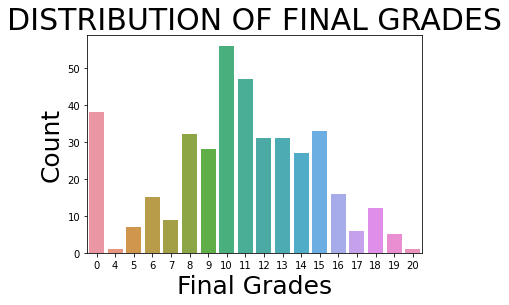

In [5]:
cPlot = sns.countplot(studentData['G3'])
plt.title("DISTRIBUTION OF FINAL GRADES",fontsize=30)
plt.xlabel('Final Grades',fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.show()

### Finding Total male/female student in the dataset

In [6]:
totalboys = len(studentData[studentData['sex'] == 'M'])
totalgirls = len(studentData[studentData['sex'] == 'F'])
print(f"Number of Boys : {totalboys}")
print(f"Number of Girls : {totalgirls}")

Number of Boys : 187
Number of Girls : 208


### Now we will drop the unwanted columns 

In [9]:
data_dum = studentData

In [11]:
data_dum.drop(["school","age"], axis = 1 , inplace = True)

In [13]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,F,U,GT3,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,F,U,GT3,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,F,U,GT3,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10


In [14]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Now we do Maping  ( Yes or No )

In [16]:
d = {'yes' : 1 , 'no' : 0 }
data_dum['schoolsup']= data_dum['schoolsup'].map(d)
data_dum['famsup']= data_dum['famsup'].map(d)
data_dum['paid']= data_dum['paid'].map(d)
data_dum['activities']= data_dum['activities'].map(d)
data_dum['nursery']= data_dum['nursery'].map(d)
data_dum['higher']= data_dum['higher'].map(d)
data_dum['internet']= data_dum['internet'].map(d)
data_dum['romantic']= data_dum['romantic'].map(d)

In [19]:
d = {'F':1 , 'M':0}
data_dum['sex']= data_dum['sex'].map(d)f

In [20]:
d = {'mother':0 , 'father':1, 'other': 2}
data_dum['guardian']= data_dum['guardian'].map(d)

### Importing SKlearn to train the mdoel

In [21]:
from sklearn.model_selection import train_test_split
x = data_dum.drop('G3',axis=1)
y = data_dum['G3']

In [22]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [24]:
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42) 

In [27]:
from sklearn.linear_model import LinearRegrassion

ImportError: cannot import name 'LinearRegrassion' from 'sklearn.linear_model' (E:\Anaconda\lib\site-packages\sklearn\linear_model\__init__.py)